<a href="https://colab.research.google.com/github/mateus-lopes/introduction-AI/blob/main/Exercicio_Keras_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemente uma rede neural CNN usando o Keras/Tensorflow com a seguinte estrutura:

* camada convolucional com 10 canais de saída, tamanho de kernel de 5 x 5 e _padding_ e _stride_ padrão (default).

* camada máxima de pooling com tamanho de kernel de 2 x 2.

* uma função de ativação ReLU.

* camada convolucional com 20 canais de saída, tamanho de kernel de 5 x 5 e preenchimento padrão
e passo.

* camada de dropout com probabilidade padrão.

* camada máxima de pooling com tamanho de kernel de 2 x2.

* uma função de ativação ReLU.

* transformação afim com 50 recursos de saída.

* uma função de ativação ReLU.

* transformação afim com 10 recursos de saída seguida por um log_softmax().

Observações:

Use o otimizador Adam com uma taxa de aprendizado de 0.001 e perda de probabilidade de log negativa
(nn.NLLLloss())

Use o  [_dataset_ do MNIST](https://www.nist.gov/el/ammt-temps/datasets)

In [6]:
!pip install tensorflow pydot graphviz

In [ ]:
# Importa as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define o modelo CNN
model = models.Sequential()

# Camadas
model.add(layers.Conv2D(10, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(20, (5, 5), activation='relu', padding='same'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Carrega e preprocessa o dataset do MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Treina o modelo
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Avalia o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 20)        5020      
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 20)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 20)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 980)              

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 63s 66ms/step - loss: 0.2199 - accuracy: 0.9345 - val_loss: 0.0856 - val_accuracy: 0.9786
Epoch 2/10
474/938 [==============>...............] - ETA: 27s - loss: 0.0733 - accuracy: 0.9770

Crie uma representação gráfica da rede neural usada

Para criar uma representação gráfica da rede neural usada, podemos utilizar a função `plot_model` do Keras. Essa função gera uma imagem visual da arquitetura da rede neural, mostrando as camadas e suas conexões.



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 20)        5020      
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 20)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 20)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 980)              

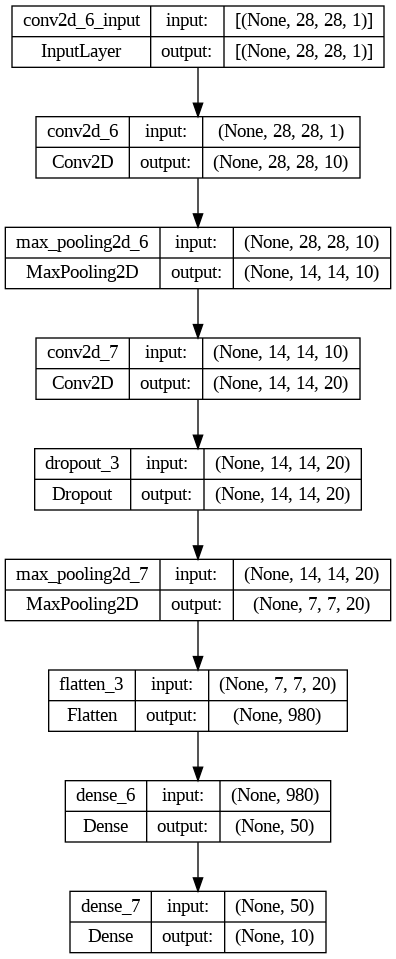

In [7]:
# Importa as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model

# Define o modelo CNN
model = models.Sequential()

# Camadas
model.add(layers.Conv2D(10, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(20, (5, 5), activation='relu', padding='same'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Gera a representação gráfica da arquitetura do modelo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)